<a href="https://colab.research.google.com/github/aneesha215/Image-classifier-fastai/blob/master/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *

In [0]:
from fastai.vision import *

In [3]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if it doesn't exist, and un-tgz to folder `dest`.



In [4]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [0]:
path=untar_data(URLs.PETS)

In [6]:
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

In [7]:
help(path.ls)

Help on method <lambda> in module fastai.core:

<lambda> lambda (...) method of pathlib.PosixPath instance



In [8]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [9]:
path/'annotations'

PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')

In [0]:
path_an=path/'annotations'
path_img=path/'images'

In [11]:
path_an

PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')

In [0]:
fname=get_image_files(path_img)

In [13]:
fname[:10]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_71.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_136.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/japanese_chin_64.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_193.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_48.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/saint_bernard_156.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_261.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Ragdoll_134.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_95.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_13.jpg')]

In [0]:
np.random.seed(2)

In [0]:
pat=r'/([^/]+)_/d+.jpg$'
pat = r'/([^/]+)_\d+.jpg$'

In [17]:
help(ImageDataBunch.from_name_re)

Help on method from_name_re in module fastai.vision.data:

from_name_re(path:Union[pathlib.Path, str], fnames:Collection[pathlib.Path], pat:str, valid_pct:float=0.2, **kwargs) method of builtins.type instance
    Create from list of `fnames` in `path` with re expression `pat`.



In [18]:
data=ImageDataBunch.from_name_re(path,fname,pat)

You can deactivate this warning by passing `no_check=True`.


/usr/local/lib/python3.6/dist-packages/fastai/basic_data.py:269: UserWarning: It's not possible to collate samples of your dataset together in a batch.
Shapes of the inputs/targets:
[[torch.Size([3, 375, 500]), torch.Size([3, 500, 345]), torch.Size([3, 375, 500]), torch.Size([3, 375, 500]), torch.Size([3, 375, 500]), torch.Size([3, 485, 500]), torch.Size([3, 225, 300]), torch.Size([3, 375, 500]), torch.Size([3, 332, 500]), torch.Size([3, 375, 500]), torch.Size([3, 225, 300]), torch.Size([3, 375, 500]), torch.Size([3, 375, 500]), torch.Size([3, 375, 500]), torch.Size([3, 500, 333]), torch.Size([3, 225, 300]), torch.Size([3, 333, 500]), torch.Size([3, 280, 500]), torch.Size([3, 376, 500]), torch.Size([3, 333, 500]), torch.Size([3, 357, 500]), torch.Size([3, 331, 500]), torch.Size([3, 500, 500]), torch.Size([3, 225, 300]), torch.Size([3, 375, 500]), torch.Size([3, 500, 333]), torch.Size([3, 375, 500]), torch.Size([3, 387, 500]), torch.Size([3, 386, 500]), torch.Size([3, 375, 500]), torch.

In [19]:
data = ImageDataBunch.from_name_re(path_img, fname, pat, ds_tfms=get_transforms(), size=224)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
japanese_chin,great_pyrenees,japanese_chin,Bengal,saint_bernard
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
scottish_terrier,american_pit_bull_terrier,beagle,beagle,boxer
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None

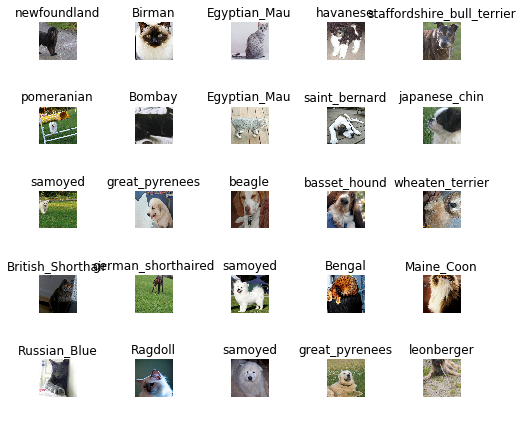

In [21]:
 data.show_batch(rows=5,figsize=(7,6))

In [24]:
help(cnn_learner)

Help on function cnn_learner in module fastai.vision.learner:

cnn_learner(data:fastai.basic_data.DataBunch, base_arch:Callable, cut:Union[int, Callable]=None, pretrained:bool=True, lin_ftrs:Union[Collection[int], NoneType]=None, ps:Union[float, Collection[float]]=0.5, custom_head:Union[torch.nn.modules.module.Module, NoneType]=None, split_on:Union[Callable, Collection[Collection[torch.nn.modules.module.Module]], NoneType]=None, bn_final:bool=False, init=<function kaiming_normal_ at 0x7f6818b3d730>, concat_pool:bool=True, **kwargs:Any) -> fastai.basic_train.Learner
    Build convnet style learner.



In [25]:
learn=cnn_learner(data,models.resnet34,metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:10<00:00, 8604906.28it/s]


In [26]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.365423,0.350327,0.894452,01:18
1,0.551914,0.287531,0.905277,01:18
2,0.351085,0.247491,0.920162,01:17
3,0.259689,0.229393,0.929635,01:18


In [0]:
learn.save('stage-1')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

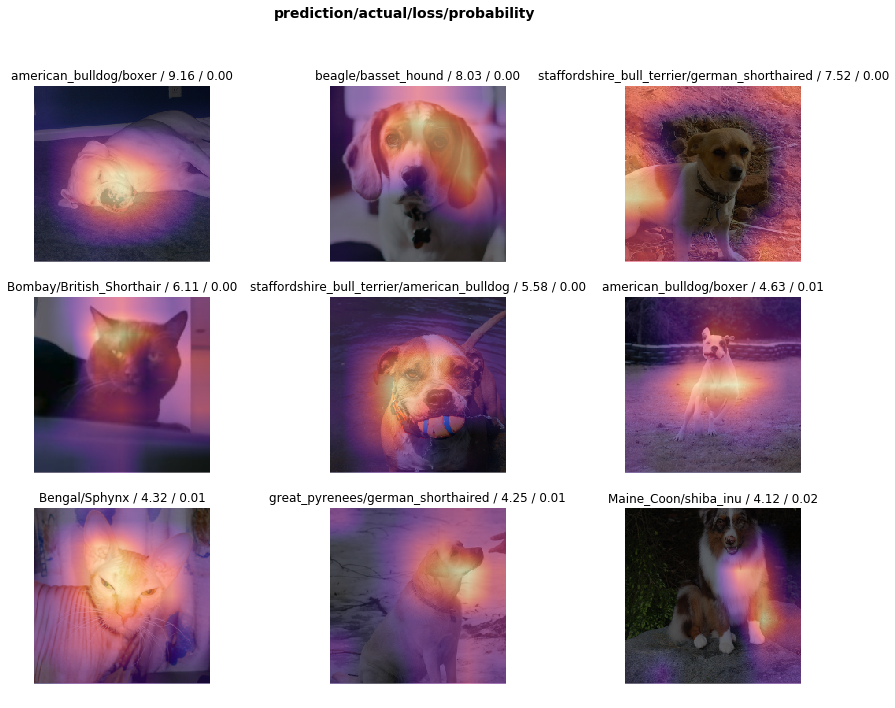

In [29]:
interp.plot_top_losses(9, figsize=(15,11))

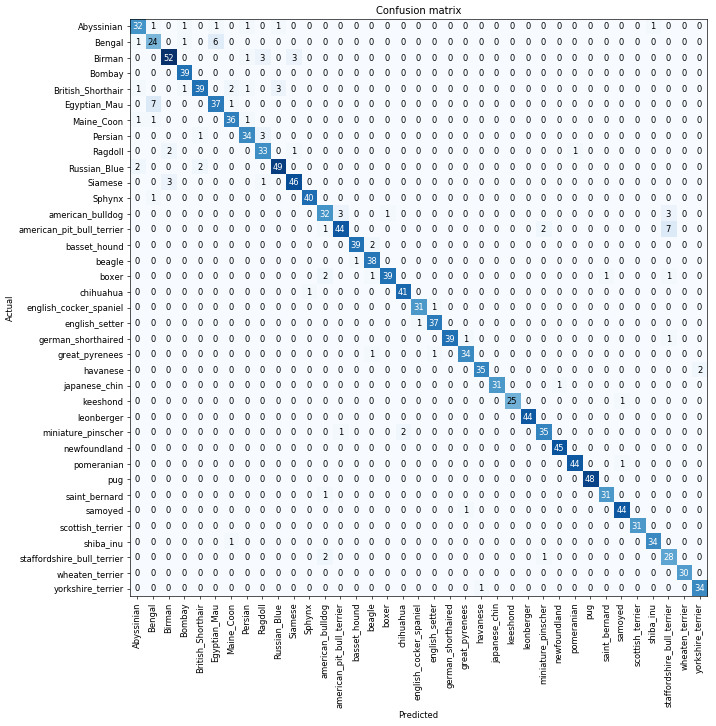

In [31]:
interp.plot_confusion_matrix(figsize=(12,12),dpi=60)

In [32]:
interp.most_confused()

[('Egyptian_Mau', 'Bengal', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 7),
 ('Bengal', 'Egyptian_Mau', 6),
 ('Birman', 'Ragdoll', 3),
 ('Birman', 'Siamese', 3),
 ('British_Shorthair', 'Russian_Blue', 3),
 ('Persian', 'Ragdoll', 3),
 ('Siamese', 'Birman', 3),
 ('american_bulldog', 'american_pit_bull_terrier', 3),
 ('american_bulldog', 'staffordshire_bull_terrier', 3),
 ('British_Shorthair', 'Maine_Coon', 2),
 ('Ragdoll', 'Birman', 2),
 ('Russian_Blue', 'Abyssinian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('american_pit_bull_terrier', 'miniature_pinscher', 2),
 ('basset_hound', 'beagle', 2),
 ('boxer', 'american_bulldog', 2),
 ('havanese', 'yorkshire_terrier', 2),
 ('miniature_pinscher', 'chihuahua', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('Abyssinian', 'Bengal', 1),
 ('Abyssinian', 'Bombay', 1),
 ('Abyssinian', 'Egyptian_Mau', 1),
 ('Abyssinian', 'Persian', 1),
 ('Abyssinian', 'Russian_Blue', 1),
 ('Abyssinian', 'shiba_inu', 1),
 ('Be

In [0]:
learn.unfreeze()

In [34]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


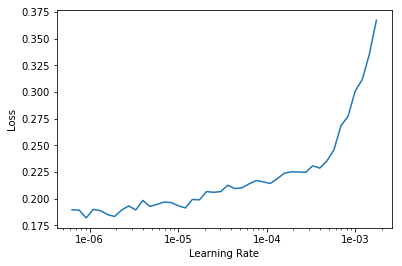

In [35]:
learn.recorder.plot()

In [37]:
learn.fit_one_cycle(6,max_lr=3e-6)

epoch,train_loss,valid_loss,accuracy,time
0,0.236948,0.228655,0.928281,01:21
1,0.218964,0.222454,0.926252,01:20
2,0.215648,0.223556,0.933694,01:20
3,0.212761,0.219289,0.930988,01:20
4,0.197655,0.217237,0.931664,01:19
5,0.186668,0.217808,0.933694,01:21
